In [3]:
import DeriveAlive as da
import numpy as np
import matplotlib.pyplot as plt

#### Case 1: three points spline (NOT WORKING SEE CASE 2)

In [18]:
x1 = da.Var([-1])
x2 = da.Var([0])
x3 = da.Var([1])

In [19]:
f = da.Var([x1, x1**2])

In [20]:
def f(var):
    return var ** 2

In [21]:
f(x1)

Var([1], [-2])

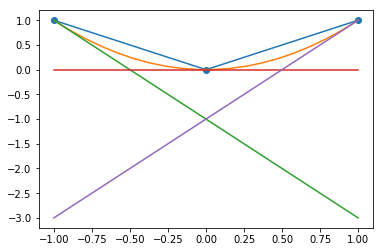

In [41]:
plt.plot([x1.val, x2.val, x3.val], [f(x1).val, f(x2).val, f(x3).val], 'o-')

# Plot original function
xs = np.linspace(-1, 1, 20)
plt.plot(xs, xs**2)

# Cut line at x1
plt.plot(xs, f(x1).der * xs + b(x1))

# Cut line at x2
plt.plot(xs, f(x2).der * xs + b(x2))

# Cut line at x3
plt.plot(xs, f(x3).der * xs + b(x3))

plt.show()

In [36]:
def b(var):
    return f(var).val - f(var).der * var.val

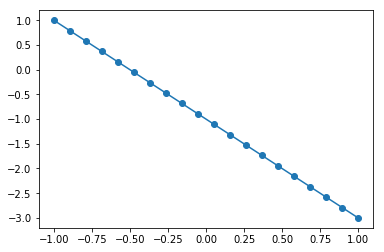

In [38]:
plt.plot(xs, f(x1).der * xs + b(x1), 'o-')
plt.show()

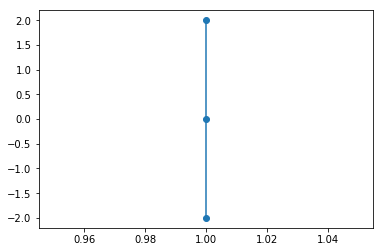

In [28]:
plt.plot([x1.der, x2.der, x3.der], [f(x1).der, f(x2).der, f(x3).der], 'o-')
plt.show()

#### Case 2: Quadratic spline

In [195]:
def a(var):
    return var ** 2

def b(var):
    return var

def c(var):
    return da.Var(1)

def quadSplineCoeff(N):
    # We will solve for x in y = Ax using np.linalg.solve
    h = 1/N
    ks = []
    for i in np.linspace(-3.14, 3.14, N+1):
        k = da.Var(i)
        ks.append(k)
        
    # Construct y
    y = []
    for i in range(N):
        y.append(f(ks[i]).val)
        y.append(f(ks[i+1]).val)
    for i in range(N):
        y.append([0])
    y = np.vstack(y)
    
    # Construct A
    A = np.zeros((3*N, 3*N))
    # Constraint 1:
    for i in range(N):
        A[2*i, 3*i] = a(ks[i]).val
        A[2*i, 3*i+1] = b(ks[i]).val
        A[2*i, 3*i+2] = c(ks[i]).val
        A[2*i+1, 3*i] = a(ks[i+1]).val
        A[2*i+1, 3*i+1] = b(ks[i+1]).val
        A[2*i+1, 3*i+2] = c(ks[i+1]).val
    # Constraint 2:
    for i in range(N-1):
        A[2*N+i, 3*i] = a(ks[i+1]).der
        A[2*N+i, 3*i+1] = b(ks[i+1]).der
        A[2*N+i, 3*i+3] = -1*a(ks[i+1]).der
        A[2*N+i, 3*i+4] = -1*b(ks[i+1]).der
    # Constraint 3:
    A[3*N-1, 1] = 10*b(ks[0]).der
    A[3*N-1, -3] = -1*a(ks[-1]).der
    A[3*N-1, -2] = -1*b(ks[-1]).der
    
    coeffs = np.linalg.solve(A, y)
        
    return y, A, coeffs, ks

In [192]:
N = 10

def f(var):
    return var.sin()
    
y, A, coeffs, ks = quadSplineCoeff(N)

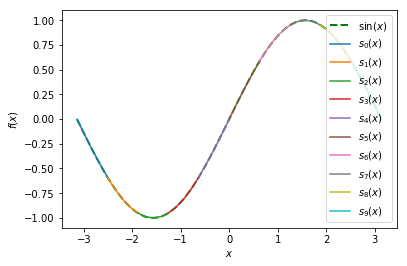

In [193]:
# Plot the function
fx = np.linspace(-3.14, 3.14, 100)
fy = np.sin(fx)
plt.plot(fx, fy, 'g--', linewidth=2, label=r'$\sin(x)$')

# Plot the splines
for i in range(N):
    a = coeffs[3*i]
    b = coeffs[3*i+1]
    c = coeffs[3*i+2]
    sx = np.linspace(ks[i].val, ks[i+1].val, 5)
    sy = a*(sx**2) + b*sx + c
    plt.plot(sx, sy, label=r'$s_{%s}(x)$' % i)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.axis()
plt.legend()
plt.show()

In [196]:
N = 10

def f(var):
    return 10**var
    
y, A, coeffs, ks = quadSplineCoeff(N)

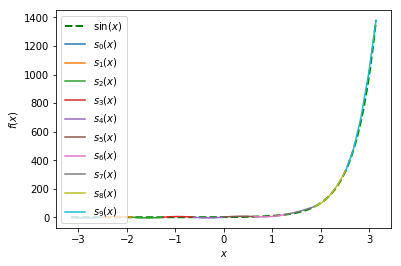

In [199]:
# Plot the function
fx = np.linspace(-3.14, 3.14, 100)
fy = 10**fx
plt.plot(fx, fy, 'g--', linewidth=2, label=r'$\sin(x)$')

# Plot the splines
for i in range(N):
    a = coeffs[3*i]
    b = coeffs[3*i+1]
    c = coeffs[3*i+2]
    sx = np.linspace(ks[i].val, ks[i+1].val, 5)
    sy = a*(sx**2) + b*sx + c
    plt.plot(sx, sy, label=r'$s_{%s}(x)$' % i)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.axis()
plt.legend(loc='lower left')
plt.show()

In [29]:
def quad_spline_coeff(f, xMin, xMax, nIntervals):
    # f: function
    # x in [xMin, xMax], N is the number of intervals
    # We will solve for x in y = Ax using np.linalg.solve
    
    h = 1/nIntervals
    ks = []
    for i in np.linspace(xMin, xMax, nIntervals+1):
        k = da.Var(i)
        ks.append(k)
    
    # Construct the quadratic functions
    def a(var):
        return var ** 2
    def b(var):
        return var
    def c(var):
        return da.Var(1)

    # Construct y
    y = []
    for i in range(nIntervals):
        y.append(f(ks[i]).val)
        y.append(f(ks[i+1]).val)
    for i in range(nIntervals):
        y.append([0])
    y = np.vstack(y)
    
    # Construct A
    A = np.zeros((3*nIntervals, 3*nIntervals))
    # Constraint 1:
    for i in range(nIntervals):
        A[2*i, 3*i] = a(ks[i]).val
        A[2*i, 3*i+1] = b(ks[i]).val
        A[2*i, 3*i+2] = c(ks[i]).val
        A[2*i+1, 3*i] = a(ks[i+1]).val
        A[2*i+1, 3*i+1] = b(ks[i+1]).val
        A[2*i+1, 3*i+2] = c(ks[i+1]).val
    # Constraint 2:
    for i in range(nIntervals-1):
        A[2*nIntervals+i, 3*i] = a(ks[i+1]).der
        A[2*nIntervals+i, 3*i+1] = b(ks[i+1]).der
        A[2*nIntervals+i, 3*i+3] = -1*a(ks[i+1]).der
        A[2*nIntervals+i, 3*i+4] = -1*b(ks[i+1]).der
    # Constraint 3:
    A[3*nIntervals-1, 1] = 10*b(ks[0]).der
    A[3*nIntervals-1, -3] = -1*a(ks[-1]).der
    A[3*nIntervals-1, -2] = -1*b(ks[-1]).der
    
    coeffs = np.linalg.solve(A, y)
        
    return y, A, coeffs, ks

In [37]:
def quad_spline_plot(f, coeffs, ks, nSplineIntervals):
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    # Plot the original function
    fx = []
    fy = []
    for k in ks:
        fx.append(k.val)
        fy.append(f(k).val)
    ax.plot(fx, fy, 'o-', linewidth=2, label='original')
    
    spline_points = []
    # Plot the splines
    for i in range(len(ks)-1):
        a = coeffs[3*i]
        b = coeffs[3*i+1]
        c = coeffs[3*i+2]
        sx = np.linspace(ks[i].val, ks[i+1].val, nSplineIntervals)
        sy = a*(sx**2) + b*sx + c
        spline_points.append([sx, sy])
        ax.plot(sx, sy, label=r'$s_{%s}(x)$' % i)
        
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    box = ax.get_position()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
    
    return fig, spline_points      

In [50]:
def spline_squared_error(f, spline_points):
    
    squared_error = 0
    for spline_point in spline_points:
        squared_error += sum((f(spline_point[0]) - spline_point[1])**2)
#         original_y = f(spline_point[0])
#         error = original_y - spline_point[1]
#         squared_error = error**2
    
    return squared_error

In [51]:
xMin = 0
xMax = 1
nIntervals = 10
nSplineIntervals = 5

def f(var):
    return 10**var

y, A, coeffs, ks = quad_spline_coeff(f, xMin, xMax, nIntervals)
fig, spline_points = quad_spline_plot(f, coeffs, ks, nSplineIntervals)
spline_squared_error(f, spline_points)

4.119602532751762e-06

In [49]:
for spline_point in spline_points:
    print(sum(f(spline_point[0]) - spline_point[1])**2)

4.149010009402193e-09
6.575737719062642e-09
1.0421841946703633e-08
1.65175063536615e-08
2.617848337746283e-08
4.149010009187686e-08
6.575737719253735e-08
1.0421841945978657e-07
1.6517506354751793e-07
2.617848337647411e-07


In [1]:
import spline as spline

In [27]:
xMin = -3.14
xMax = 3.14
nIntervals = 10
nSplineIntervals = 5

def f(var):
    return var.exp()

y, A, coeffs, ks = spline.quad_spline_coeff(f, xMin, xMax, nIntervals)
fig, spline_points = spline.quad_spline_plot(f, coeffs, ks, nSplineIntervals)
spline.spline_squared_error(f, spline_points)

0.0319103679798015

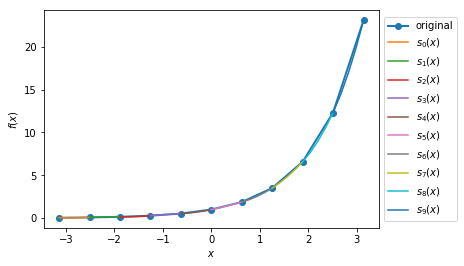

In [28]:
fig

In [15]:
def f(var):
    return 10**var

y, A, coeffs, ks = spline.quad_spline_coeff(f, xMin, xMax, nIntervals)
fig, spline_points = spline.quad_spline_plot(f, coeffs, ks, nSplineIntervals)
spline.spline_squared_error(f, spline_points)

4.119602532751762e-06

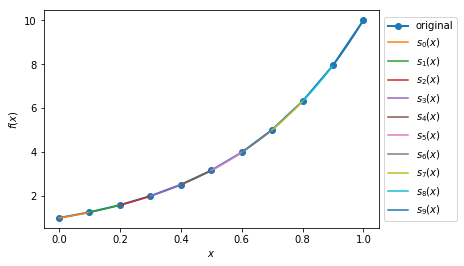

In [16]:
fig

In [13]:
for spline_point in spline_points:
    print(splineVar(spline_point[0]))

NameError: name 'splineVar' is not defined

In [13]:
spline_points[0]

[array([-3.14  , -3.0615, -2.983 , -2.9045, -2.826 ]),
 array([-0.00159265, -0.08151763, -0.15962383, -0.23591126, -0.31037991])]